# Data Prep

In [1]:
from scripts.parquetreader import read_parquet_file
from scripts.dataprep import prepare_and_split_data_grouped
import os,sys
import pandas as pd

current_directory = os.getcwd()
parquet_file_path = os.path.join(current_directory, 'input', 'sample_trainingdata.parquet')

dfmodelstep1=read_parquet_file(parquet_file_path)
print(dfmodelstep1.shape[0])

# Assuming dfmodelstep1 is your DataFrame, 'target' is your target column
savcols=['customer_ID','S_2']
Target='target'
group='customer_ID'

X,X_train,X_test,X_train_scaled, X_test_scaled, y_train, y_test, identifiers_train, identifiers_test,feature_names = prepare_and_split_data_grouped(dfmodelstep1, Target,savcols, group)


1807466
Separate features, target, and identifiers, ensuring group column is included in identifiers
Performing group-based train-test split
Normalizing data (scaling)
Ensure the non-numeric data is concatenated back after scaling
Transformation complete


# Model RUn

In [2]:
import importlib
import scripts.model_transformer 
importlib.reload(scripts.model_transformer)
from scripts.model_transformer import create_model_with_transformer_and_train

model, history, test_accuracy,y_test, y_pred,X_test_reshaped,X_train_reshaped = create_model_with_transformer_and_train(X_train_scaled,y_train, X_test_scaled, y_test)

Epoch 1/5
9035/9035 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8672 - loss: 0.2901 - val_accuracy: 0.8761 - val_loss: 0.2727
Epoch 2/5
9035/9035 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8752 - loss: 0.2754 - val_accuracy: 0.8759 - val_loss: 0.2726
Epoch 3/5
9035/9035 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8751 - loss: 0.2743 - val_accuracy: 0.8759 - val_loss: 0.2718
Epoch 4/5
9035/9035 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8756 - loss: 0.2737 - val_accuracy: 0.8762 - val_loss: 0.2720
Epoch 5/5
9035/9035 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8758 - loss: 0.2730 - val_accuracy: 0.8766 - val_loss: 0.2711
11310/11310 ━━━━━━━━━━━━━━━━━━━━ 3s 264us/step

Test Accuracy: 0.8720230118181491


# performance and Confusion Matrix

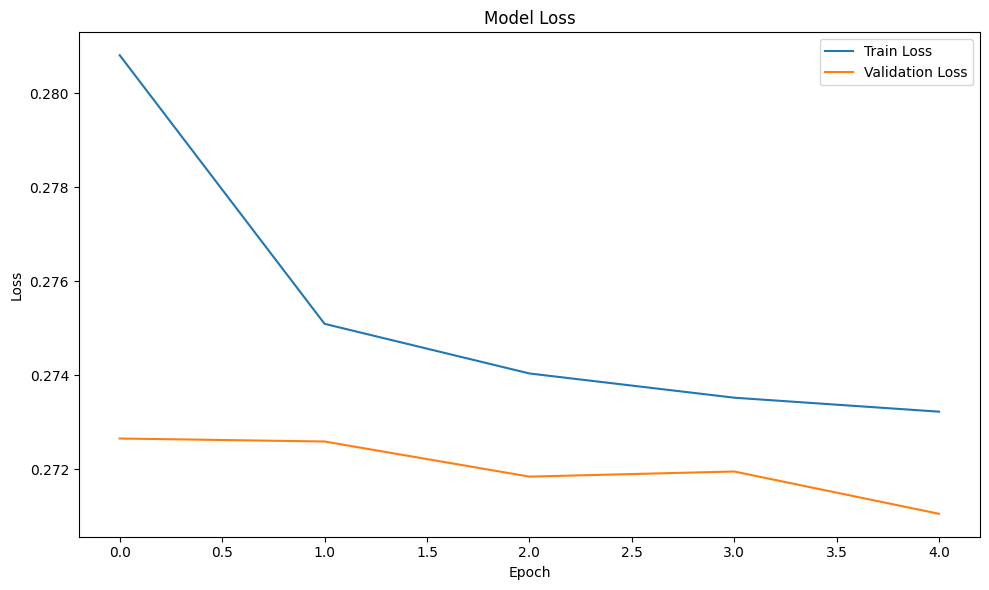

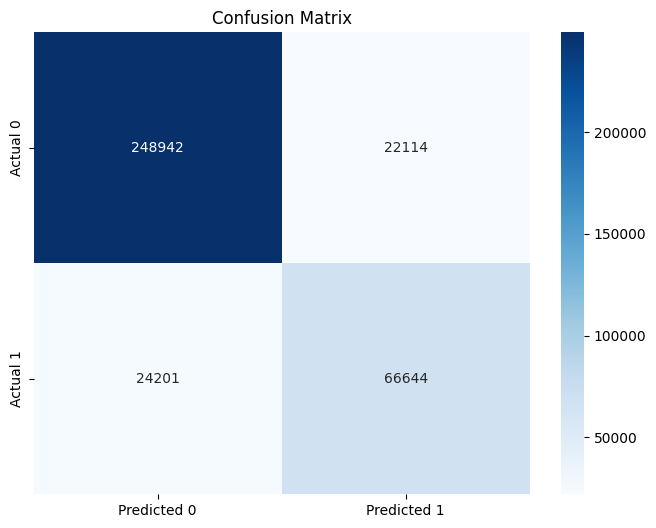

In [3]:
import importlib
import scripts.charting as charting_module
importlib.reload(charting_module)
from scripts.charting import plot_model_loss, plot_confusion_matrix, interactive_confusion_matrix

plot_model_loss(history.history['loss'], history.history.get('val_loss', None))
plot_confusion_matrix(y_test, y_pred)

# Top Features

Select numeric columns only
Ensure feature_names only includes names of numeric columns
Initialize and fit the Logistic Regression model
Extract the coefficients of the model
Sort the features by the absolute value of their coefficients
Plot the top N features based on their importance


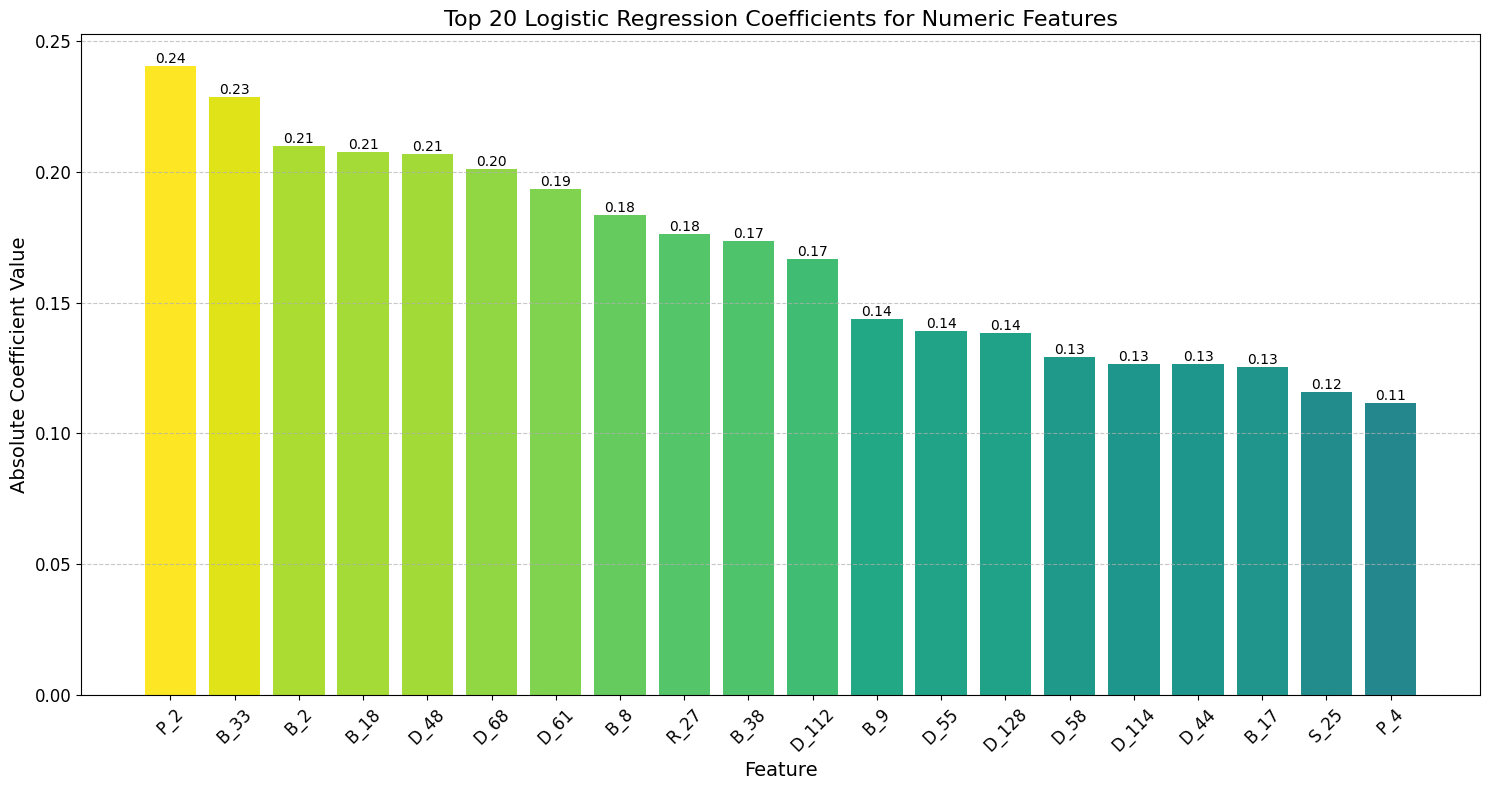

In [5]:
import importlib
import scripts.topfeatures as topfeatures
importlib.reload(topfeatures)
from scripts.topfeatures import fit_and_plot_logistic_regression

from scripts.topfeatures import fit_and_plot_logistic_regression
fit_and_plot_logistic_regression(X_train, X_test, y_train, y_test,feature_names,max_iter=1000, top_features=20)


# Tensorboard

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Start TensorBoard within the notebook using the directory where the logs are stored
%tensorboard --logdir logs/fit